#  Task-2 :   By The Sparks Foundation
---
## Unsupervised Machine Learning  
### From  ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
---
### Name : Akash Patel
### Email ID : imakashpatel3011@gmail.com
### Github Profile : https://github.com/imakash3011/
### Linkedin Profile : https://www.linkedin.com/in/imakash3011/


###### importing the required library

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###### Reading the data from "iris.csv" dataset

In [93]:
iris_data = pd.read_csv('iris.csv')

###### Getting the first five value from the dataset

In [94]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


###### To generate descriptive statistics

In [95]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


###### To get concise summary of a DataFrame

In [96]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


###### Droping or removing the column named "Id"

In [97]:
iris_data.drop(["Id"], axis=1, inplace=True)

###### To plot pairwise relationships in a dataset

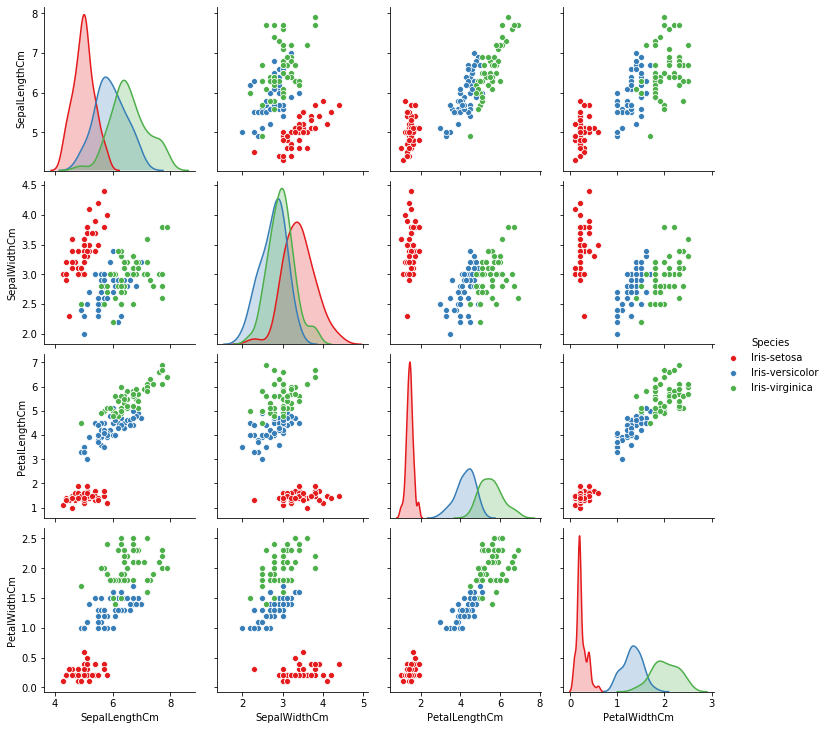

In [98]:
sns.pairplot(data= iris_data, hue='Species', palette='Set1')
plt.show()

###### Importing library

In [83]:
from sklearn.cluster import KMeans

###### To get the optimum number of clusters for k-means classification
######  Here We are using Elbow Method to get the number of cluster  (We are Randomly initializing the value to get the number of cluster)

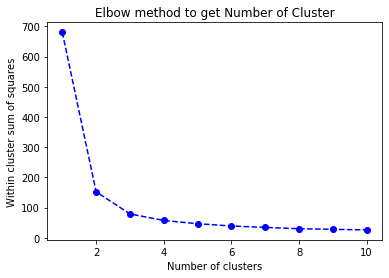

In [84]:
x = iris_data.iloc[:,[0,1,2,3]].values

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss,'bo--')
plt.title('Elbow method to get Number of Cluster')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

###### Creating  K-mean Classifier

In [88]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

###### Visualising Clusters

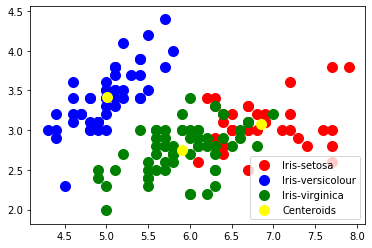

In [89]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], 
           s=100, c= 'blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s=100, c='green', label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=100, c='yellow', label='Centeroids')
plt.legend()